0.863759987707437 0.0013603421633851531
0.8604025814382299


ValueError: x and y must have same first dimension, but have shapes (500,) and (28,)

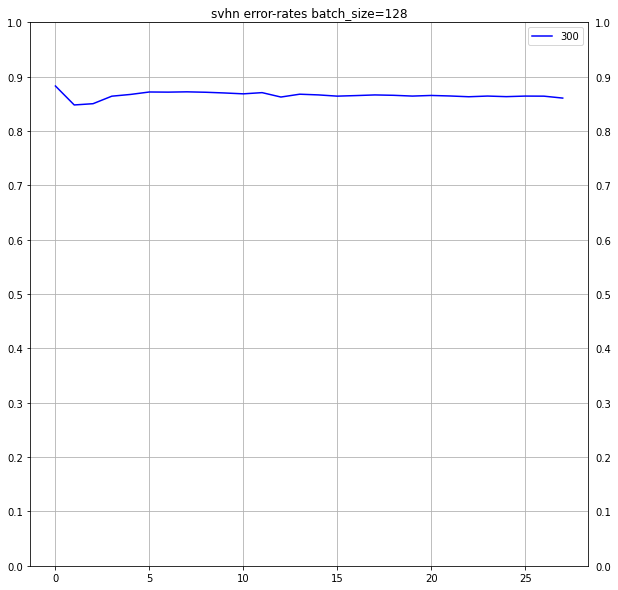

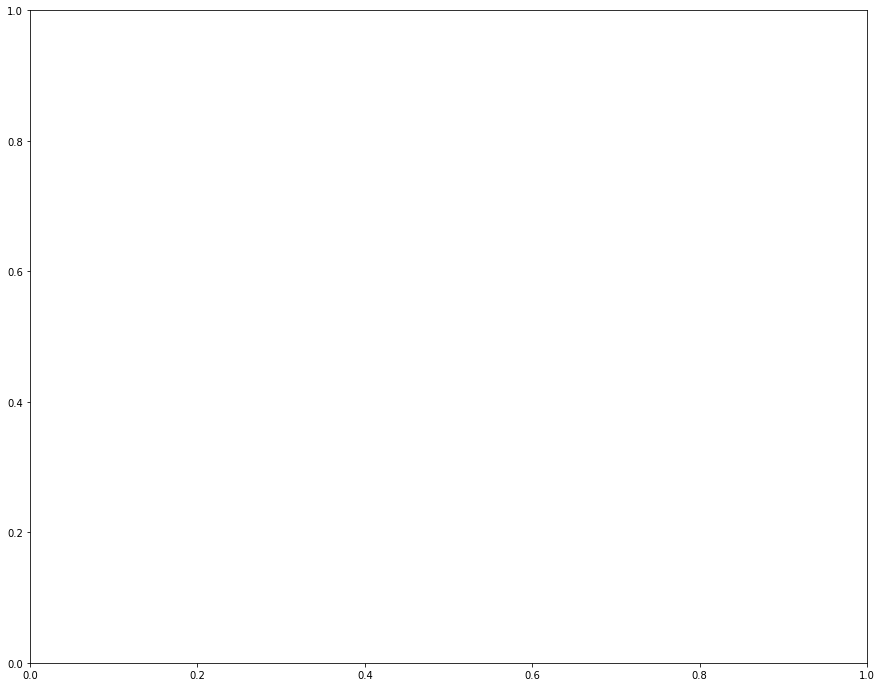

In [37]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


hy_list=[0.01,0.1,0.3,0.5,0.7,0.9]
batch_size_list=[16,32,64,128,256] #you can also select different bagsize as the hy

def load_index_1(hy,dataset_name,batch_size,sample,z_dim):
    #npy  suffix
    #y1=np.load('./index/'+ dataset_name +'/ce_loss_epoch_train '+str(hy) +'_'+str(batch_size)+'.npy')
    y2=np.load('./index/'+ dataset_name + '/'+sample+ ' '+str(z_dim)+' entropy_instance_level_epoch_test '+str(hy)+ '_'+str(batch_size)+'.npy')
    #y3=np.load('./index/'+ dataset_name +'/'+sample+ ' '+str(z_dim)+' cross_entropy_instance_level_epoch_test '+str(hy)+ '_'+str(batch_size)+'.npy')
    y4=np.load('./index/'+ dataset_name + '/'+sample+ ' '+str(z_dim)+' reconstruct_loss_epoch_test '+str(hy)+ '_'+str(batch_size)+'.npy')
    y5=np.load('./index/'+ dataset_name + '/'+sample+ ' '+str(z_dim)+' err_epoch_test '+str(hy)+ '_'+str(batch_size)+'.npy')
    
    
    
    return [y2,y4,y5]

def load_index_2(hy,dataset_name,batch_size,sample,z_dim):
    #npy  suffix
    #y1=np.load('./index/'+ dataset_name +'/ce_loss_epoch_train '+str(hy) +'_'+str(batch_size)+'.npy')
    y2=np.load('./index/'+ dataset_name +'/entropy_instance_level_epoch_test '+str(hy)+ '_'+str(batch_size)+'.npy')
    #y3=np.load('./index/'+ dataset_name +'/'+sample+ ' '+str(z_dim)+' cross_entropy_instance_level_epoch_test '+str(hy)+ '_'+str(batch_size)+'.npy')
    y4=np.load('./index/'+ dataset_name +'/reconstruct_loss_epoch_test '+str(hy)+ '_'+str(batch_size)+'.npy')
    y5=np.load('./index/'+ dataset_name +'/err_epoch_test '+str(hy)+ '_'+str(batch_size)+'.npy')
    
    return [y2,y4,y5]
    
def plot_different_parameter_compare_1(batch_size_list, hy_list,dataset_name,sample,z_dim):
    dic={}
    batch_size=batch_size_list[0]
    for hy in hy_list:
        for batch_size in batch_size_list:
            index_list=load_index_1(hy, dataset_name, batch_size,sample,z_dim)
            dic[str(hy)+ ' ' +str(batch_size)]=index_list
    y1=dic[str(hy)+' '+str(batch_size)][-1]

    #l=min(len(y1),len(y2))
    l=len(y1)
    print(np.mean(y1[l-10:l]),np.std(y1[l-10:l]))
    #print(np.mean(y2[l-10:]),np.std(y2[l-10:]))
    print(y1[-1])
    
    xtick=np.arange(0,l,1)
    plt.figure(figsize=(10,10))
    ax=plt.gca()
    ax.grid()
    ax.tick_params(labelright=True)
    plt.title(dataset_name+' error-rates batch_size=%d'%batch_size)
    plt.ylim(0,1)
    plt.yticks(np.arange(0,1.1,0.1))
    plt.plot(xtick,y1[:l],color='b')
    #plt.plot(xtick,y2[:l],color='r')
    plt.legend([str(i) for i in hy_list]+['dllp'])
    
    return y1[:500]
    
    #plt.savefig(dataset_name+' error-rates batch_size=%d'%batch_size+'.jpg')
    
def plot_different_parameter_compare_2(batch_size_list, hy_list,dataset_name,sample,z_dim):
    dic={}
    batch_size=batch_size_list[0]
    for hy in hy_list:
        for batch_size in batch_size_list:
            index_list=load_index_2(hy, dataset_name, batch_size,sample,z_dim)
            dic[str(hy)+ ' ' +str(batch_size)]=index_list
    y1=dic[str(hy)+' '+str(batch_size)][-1]

    #l=min(len(y1),len(y2))
    #l=len(y1)
    l=500
    print(np.mean(y1[l-10:l]),np.std(y1[l-10:l]))
    #print(np.mean(y2[l-10:]),np.std(y2[l-10:]))
    print(y1[-1])
    
    xtick=np.arange(0,l,1)
    plt.figure(figsize=(10,10))
    ax=plt.gca()
    ax.grid()
    ax.tick_params(labelright=True)
    plt.title(dataset_name+' error-rates batch_size=%d'%batch_size)
    plt.ylim(0,1)
    plt.yticks(np.arange(0,1.1,0.1))
    plt.plot(xtick,y1[:l],color='b')
    #plt.plot(xtick,y2[:l],color='r')
    plt.legend([str(i) for i in hy_list]+['dllp'])
    
    return y1[:500]
    

if __name__=='__main__':
    
    #a=plot_different_parameter_compare_1([16],[300],'cifar10','normal',z_dim=50)
    #plot_different_parameter_compare_1([16],[300],'cifar10','normal',z_dim=10)
    #plot_different_parameter_compare_1([128],[10],'svhn','normal',z_dim=60)
    #a=plot_different_parameter_compare_1([64],[10],'cifar10','normal',z_dim=60)
    #b=plot_different_parameter_compare_2([64],[100],'cifar10','normal',z_dim=64)
    #d=plot_different_parameter_compare_1([64],[1000],'cifar10','normal',z_dim=60)
    #g=plot_different_parameter_compare_1([64],[10000],'cifar10','normal',z_dim=60)
    #e=plot_different_parameter_compare_1([64],[10],'svhn','normal',z_dim=2)
    f=plot_different_parameter_compare_1([128],[300],'svhn','normal',z_dim=2)
    #g=plot_different_parameter_compare_1([64],[1000],'svhn','normal',z_dim=2)
    #h=plot_different_parameter_compare_1([64],[10000],'svhn','normal',z_dim=2)
    #i=plot_different_parameter_compare_1([64],[0.1],'mnist','normal',z_dim=2)
    #j=plot_different_parameter_compare_1([64],[1],'mnist','normal',z_dim=2)
    #k=plot_different_parameter_compare_1([64],[10],'mnist','normal',z_dim=2)
    #l=plot_different_parameter_compare_1([64],[100],'mnist','normal',z_dim=2)
    xtick=range(500)
    plt.figure(figsize=(15,12))
    #plt.plot(xtick,e,color='red',lw=2)
    plt.plot(xtick,f,color='blue',lw=2)
    #plt.plot(xtick,k,color='green',lw=2)
    #plt.plot(xtick,l,color='c',lw=1)
    #plt.grid()
    plt.yticks(np.arange(0,1.2,0.2),size=35)
    plt.xticks(np.arange(0,600,100),size=35)
    plt.xlim(0,500)
    plt.ylim(0,1)
    plt.xlabel('Epoch',fontsize=40)
    plt.ylabel('Error',fontsize=40)
    plt.legend([0.1,1,10,100],fontsize=30,edgecolor='k',loc='upper right')
    #plt.savefig('cifar10.png')
    #plt.savefig('svhn.png')
    #plt.savefig('mnist.png')
    #plot_different_parameter_compare_2([16],[300],'svhn','normal',z_dim=60)
    

In [110]:
_,_,err=load_index_1(300,'svhn',64,'normal',2)
print(np.mean(err[-5:]),np.std(err[-5:]))

0.07047480024585129 0.0013370369795618503


In [35]:
import time
start=time.time()
time.sleep(10)
end=time.time()
t=end-start
t

10.010185956954956

0.141180086047941 0.0020802518536348503
[0.88264444 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80389521 0.80112938 0.80351106 0.79978488 0.79102643
 0.79302397 0.7957898 

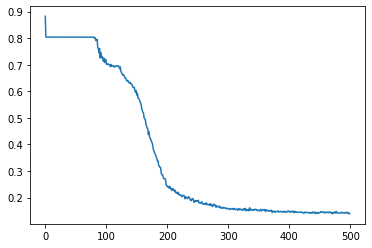

In [63]:
from matplotlib import pyplot as plt

x=np.load('./index/svhn/normal 2 err_epoch_test 300_128 --.npy')
plt.plot(x[:500])


print(np.mean(x[495:500]),np.std(x[495:500]))

print(x[0:100])

[0.07252612 0.06872311 0.07129687 0.07033651 0.0694914 ]
[0.88045482 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569 0.80412569
 0.80416411 0.80412569 0.80412569 0.79594345 0.78453442 0.75195913
 0.7093193  0.7036724  0.70444069 0.69714198 0.69510602 0.69157191
 0.68308236 0.67977873 0.67340197 0.66698679 0.65016134 0.64159496
 0.63487246 0.62227259 0.61720191 0.60245083 0.59261678 0.55815919
 0.53365089 0.45509373 0.40634604 0.3758067  0.33670098 0.29913184
 0.29056546 0.25218961 0.22775814 0.22472342 0.20924247 0.19960049
 0.18799939 0.17947142 0.17997081 0.17662876 0.15880455 0.1629917
 0.162185   0.15757529 0.15223571 0.15634604 0.15288875 0.16817763
 0.1527351  0.1484327  0.13832975 0.13794561 0.13717732 0.1271512
 0.1334

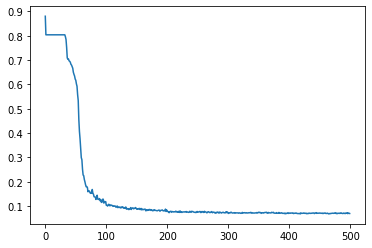

In [81]:
from matplotlib import pyplot as plt

x=np.load('./index/svhn/normal 2 err_epoch_test 300_64.npy')
plt.plot(x)


print(x[495:500])

print(x[0:100])

print(np.mean(x[-5:]),np.std(x[-5:]))

[]
[0.8997 0.8101 0.7945 0.7303 0.7339 0.6911 0.6695 0.6685 0.6483 0.615 ]
0.65848 0.025612684357560037


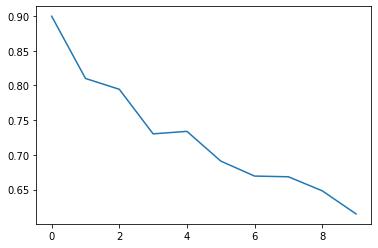

In [2]:
from matplotlib import pyplot as plt
import numpy as np

x=np.load('./index/cifar10/normal 60 err_epoch_test 300_32.npy')
plt.plot(x)


print(x[495:500])

print(x[0:100])

print(np.mean(x[-5:]),np.std(x[-5:]))


0.35692 0.002685814587792715


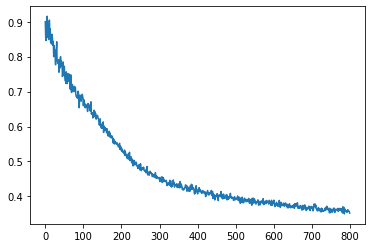

In [3]:
from matplotlib import pyplot as plt
import numpy as np

x=np.load('./index/cifar10/normal 60 err_epoch_test 300_128.npy')
plt.plot(x)


print(np.mean(x[-5:]),np.std(x[-5:]))

0.20542 0.004279906541035686


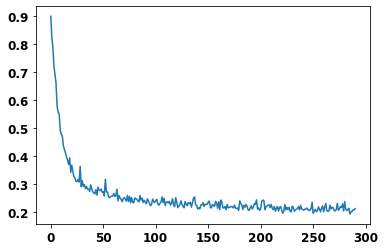

In [206]:
from matplotlib import pyplot as plt

x=np.load('./index/cifar10/normal 60 err_epoch_test 300_16.npy')
plt.plot(x)


print(np.mean(x[-5:]),np.std(x[-5:]))

0.38682 0.0023574562562219243


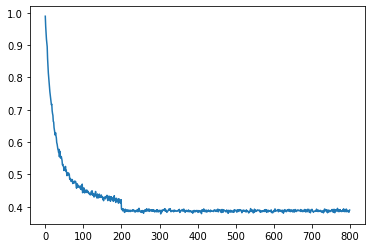

In [9]:
from matplotlib import pyplot as plt

x=np.load('./index/cifar100/normal 60 err_epoch_test 300_16.npy')



plt.plot(x)


print(np.mean(x[-5:]),np.std(x[-5:]))


1.2317460686972481e-06 0.0


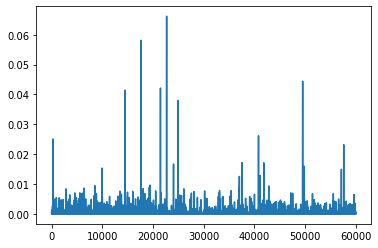

In [194]:
from matplotlib import pyplot as plt

ent=np.load('./index/'+ 'mnist' +'/'+str(10) +'_'+str(16)+'_'+'llp_aae'+'normal'+str(1)+' ent.npy')

plt.plot(ent)

print(np.mean(ent[-5:]),np.std(ent[-5:]))


[0.0171 0.0174 0.0173 0.0172 0.0173]
[0.9313 0.0512 0.0434 0.0411 0.0344 0.0282 0.034  0.0292 0.03   0.0228
 0.0258 0.0261 0.0246 0.0275 0.0215 0.0299 0.0227 0.0337 0.024  0.0212
 0.0238 0.0255 0.022  0.0232 0.0302 0.0275 0.0251 0.0258 0.0396 0.0251
 0.0219 0.0256 0.0226 0.025  0.0202 0.0258 0.0227 0.0242 0.0224 0.0231
 0.021  0.0216 0.0211 0.0204 0.0209 0.0216 0.0195 0.0208 0.019  0.017
 0.0255 0.0205 0.0276 0.0208 0.0209 0.0227 0.0234 0.019  0.0212 0.025
 0.0204 0.0221 0.0221 0.0203 0.0222 0.0201 0.0292 0.0196 0.0204 0.0254
 0.0201 0.0222 0.0194 0.0235 0.0223 0.0182 0.024  0.0215 0.0204 0.0232
 0.0183 0.021  0.0249 0.0178 0.0217 0.0254 0.0192 0.0214 0.0191 0.0209
 0.0336 0.0207 0.0195 0.0189 0.0252 0.0176 0.0209 0.0203 0.0208 0.0195]
0.017259999999999987 0.00010198039027184446


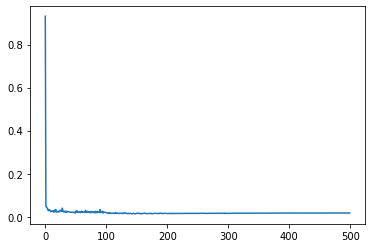

In [10]:
from matplotlib import pyplot as plt

x=np.load('./index/mnist/normal 2 err_epoch_test 10_16.npy')
plt.plot(x)


print(x[495:500])

print(x[0:100])


print(np.mean(x[-5:]),np.std(x[-5:]))

In [15]:
a=[0.9087,0.9103,0.9104,0.9111,0.9109]

np.mean(a)
#np.std(a)

0.91028